In [2]:
import numpy as np
import matplotlib.pyplot as plt

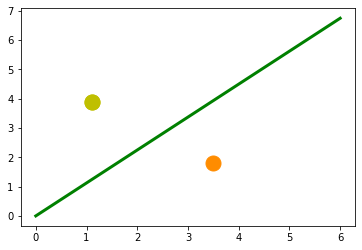

In [6]:
X = np.arange(0, 7)
fig, ax = plt.subplots()

ax.plot(3.5, 1.8, "or", color="darkorange", 
        markersize=15)
ax.plot(1.1, 3.9, "oy", markersize=15)

point_on_line = (4, 4.5)
ax.plot(1.1, 3.9, "oy", markersize=15)
m = point_on_line[1] / point_on_line[0]  # gradient
ax.plot(X, m * X, "g-", linewidth=3)
plt.show()

In [8]:
lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4

# amount of y-distance to be added(+) or removed(-) to reach to the seperating line.
# i.e if above -> - and below -> +.

# check if orange is below the line,
# positive value is expected:
print(orange[0] * m - orange[1])

# check if lemon is above the line,
# negative value is expected:
print(lemon[0] * m - lemon[1])

2.1375
-2.6624999999999996


In [9]:
def create_distance_function(a, b, c):
    """ 0 = ax + by + c """
    def distance(x, y):
        """ returns tuple (d, pos)
            d is the distance
            If pos == -1 point is below the line, 
            0 on the line and +1 if above the line
        """
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom<0 and b<0) or (nom>0 and b>0):  # consider points in 3rd coordinates as well to understand
            pos = -1
        else:
            pos = 1
        return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)
    return distance

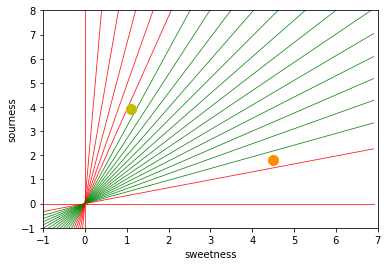

In [10]:
orange = (4.5, 1.8)
lemon = (1.1, 3.9)
fruits_coords = [orange, lemon]

fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)

step = 0.05
for x in np.arange(0, 1+step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    Y = slope * X
    results = []
    for point in fruits_coords:
        results.append(dist4line1(*point))
    if (results[0][1] != results[1][1]):
        ax.plot(X, Y, "g-", linewidth=0.8, alpha=0.9)
    else:
        ax.plot(X, Y, "r-", linewidth=0.8, alpha=0.9)
 
size = 10
for (index, (x, y)) in enumerate(fruits_coords):
    if index== 0:
        ax.plot(x, y, "o", 
                color="darkorange", 
                markersize=size)
    else:
        ax.plot(x, y, "oy", 
                markersize=size)


plt.show()

In [11]:
def points_within_circle(radius, 
                         center=(0, 0),
                         number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi  # angle in radian
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y

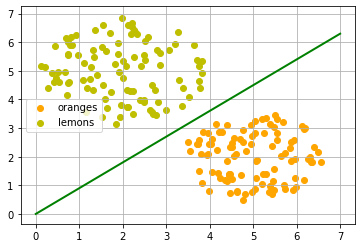

In [15]:
X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)

ax.scatter(oranges_x, oranges_y, c="orange", label="oranges")
ax.scatter(lemons_x, lemons_y, c="y", label="lemons")

ax.plot(X, 0.9 * X, "g-", linewidth=2)

ax.legend()
ax.grid()
plt.show()

In [17]:
import time
from itertools import repeat
from random import shuffle

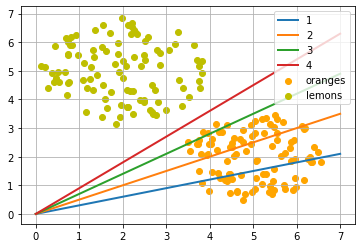

0.8999999999999999


In [22]:
slope = 0.1

X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x, oranges_y, c="orange", label="oranges")
ax.scatter(lemons_x, lemons_y, c="y", label="lemons")

fruits = list(zip(oranges_x, oranges_y, repeat(0, len(oranges_x)))) 
fruits += list(zip(lemons_x, lemons_y, repeat(1, len(oranges_x))))
shuffle(fruits)

learning_rate = 0.2

line = None
counter = 0
for x, y, label in fruits:
    res = slope * x - y
    if label == 0 and res < 0:
        # point is above line but should be below => increment slope
        slope += learning_rate
        counter += 1
        ax.plot(X, slope * X, linewidth=2, label=str(counter))
        
    elif label == 1 and res > 1:
        # point is below line but should be above => decrement slope
        slope -= learning_rate
        counter += 1
        ax.plot(X, slope * X,  linewidth=2, label=str(counter))

ax.legend()
ax.grid()
plt.show()

print(slope)